<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_ex_matplotlib2_solucao_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Evolução**

Aprimore aqui como empregar o modo `artist layer` e como empregar gráficos de linha para acompanhar a tendência ou evolução dos dados.

<br>

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

* Capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

* Capítulo [Evolução](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c3_parte_1.html)

* https://matplotlib.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [2]:
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


In [3]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
df.head()


skipping


# Pré Exercício Iterando no `ax[i,j]`

Veja aqui formas diferentes de empregar o vetor `ax`.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

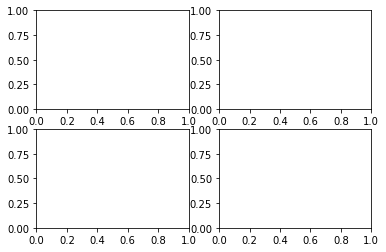

In [4]:
fig, ax = plt.subplots(2,2)
ax

In [5]:
ax.reshape(-1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [6]:
( ax1, ax2 ) = ax 
ax1

array([<Axes: >, <Axes: >], dtype=object)

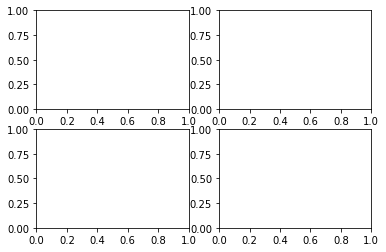

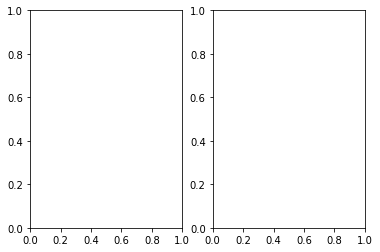

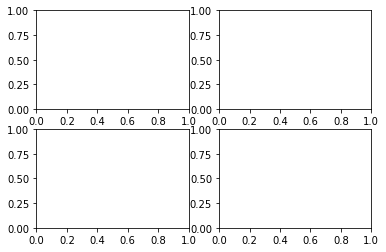

In [7]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Exercício 1  

Use algumas das formas acima para, partindo do último exercício da lista anterior, produzir um gráfico como abaixo para os sujeitos `s0` a `s8`, empregando o modo `artist layer` e **iterando sobre os elementos de `ax`**. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_1.png)

Q. Você pode concluir que todos os sinais, de estímulos e repouso, têm aproximadamente o mesmo comportamento para todos os sujeitos? 

### Solução 1: iterando `i,j`

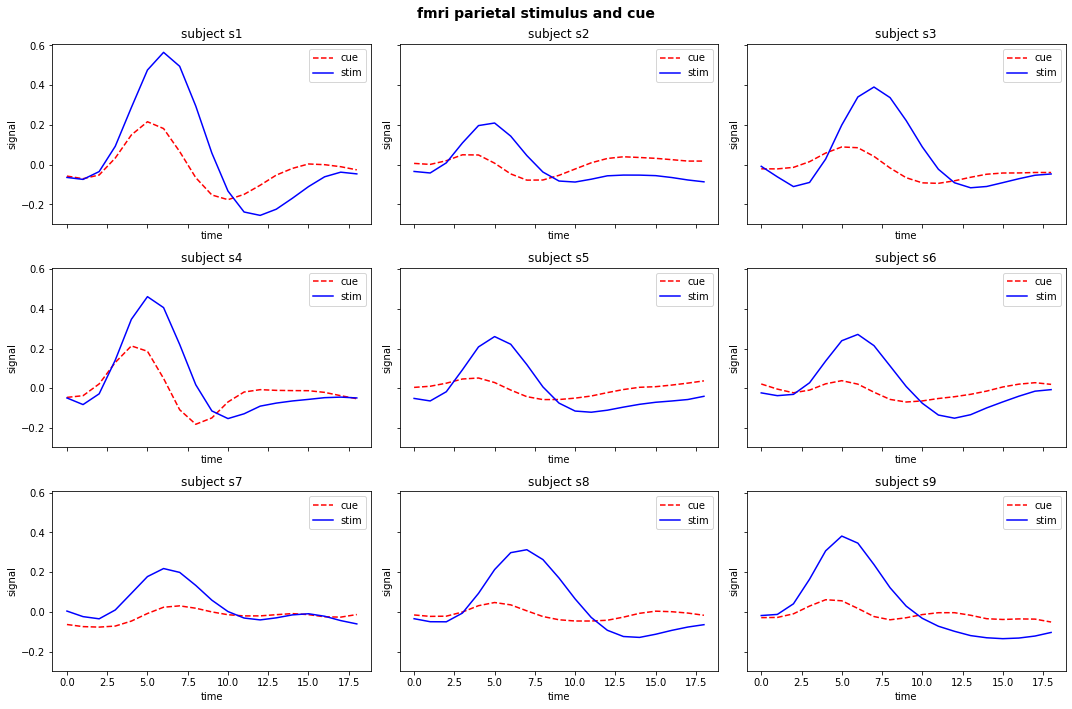

In [11]:
fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 1

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df.event.unique():
      mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal') 
      ax[i,j].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

### Solução 2: iterando `i`

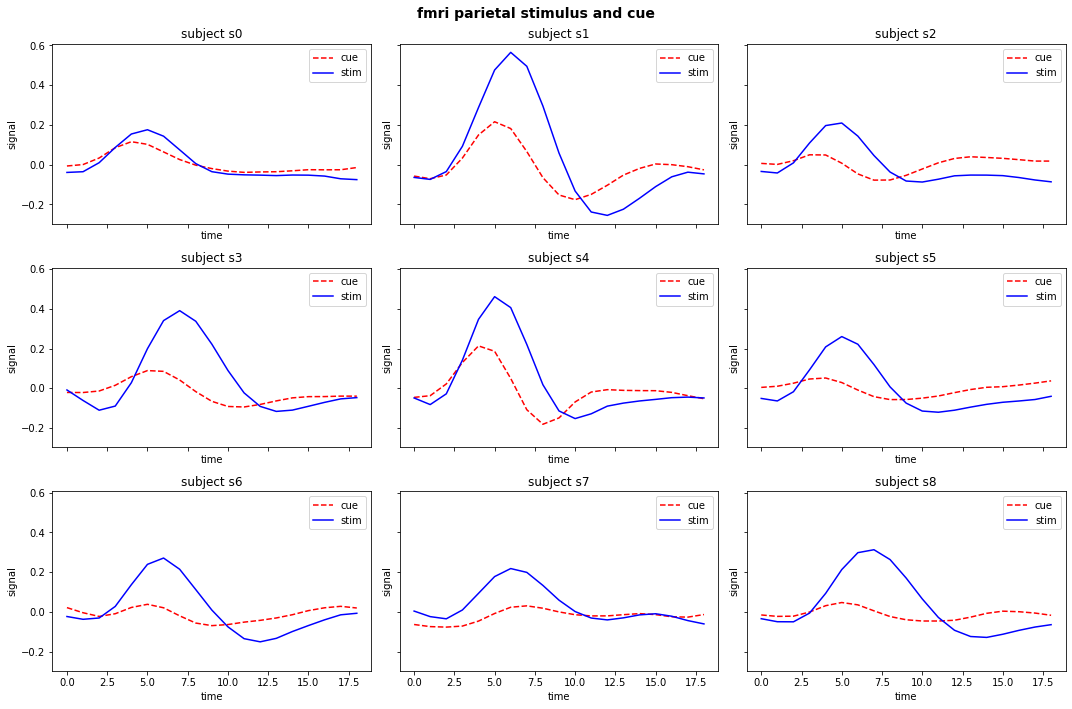

In [12]:
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

ax = axis.reshape(-1)

for i in range(0,9):
  s = 's' + str(i)

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal') 
    ax[i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('subject ' + s, fontsize=12)
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

Experimente também o `zip` para as iterações...

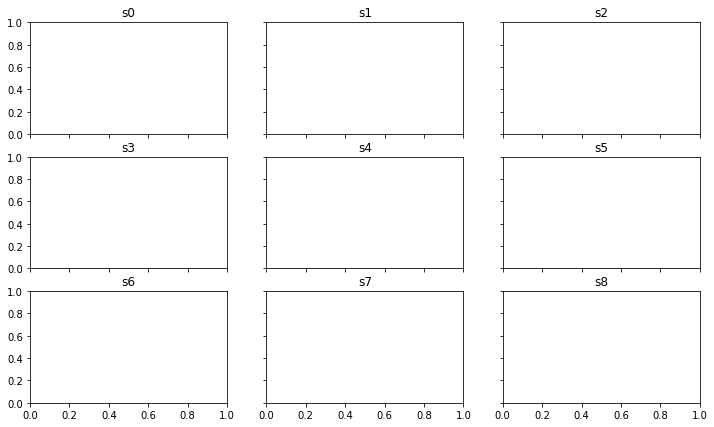

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(12,7),sharex=True,sharey=True)

for axis, s in zip(ax.reshape(-1),(['s' + str(x) for x in range(0,10)])):
  axis.set_title(s)

plt.show()
